# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


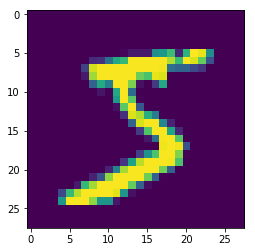

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Convolution2D, MaxPooling2D,GlobalAveragePooling2D

In [11]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
# num_pixels = X_train.shape[1]*X_train.shape[2]
# X_train = X_train.reshape(X_train.shape[0],num_pixels).astype('float32')
# X_test = X_test.reshape(X_test.shape[0],num_pixels).astype('float32')


# num_pixels = X_train.shape[1] * X_train.shape[2]
# X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [0]:
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization

In [156]:
from keras.layers import Activation
model = Sequential()

#block 1 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(20, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Convolution2D(10, 1, 1, activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) #12
 
#block 2
model.add(Convolution2D(20, 3, 3, activation='relu')) #10
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(20, 3, 3, activation='relu')) #8
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10,1,activation='relu')) #8

model.add(Convolution2D(10,8)) #8



model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [157]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_161 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_93 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_86 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_162 (Conv2D)          (None, 24, 24, 20)        1820      
_________________________________________________________________
batch_normalization_94 (Batc (None, 24, 24, 20)        80        
_________________________________________________________________
dropout_87 (Dropout)         (None, 24, 24, 20)        0         
_________________________________________________________________
conv2d_163 (Conv2D)          (None, 24, 24, 10)        210       
__________

In [0]:
from keras.optimizers import SGD
opt = SGD(lr=0.04, momentum=0.9)

In [0]:
from keras.callbacks import *

class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency, as detailed in this paper (https://arxiv.org/abs/1506.01186).
    The amplitude of the cycle can be scaled on a per-iteration or 
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each 
        cycle iteration.
    For more detail, please see paper.
    
    # Example
        ```python
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., mode='triangular')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    
    Class also supports custom scaling functions:
        ```python
            clr_fn = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='cycle')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```    
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore 
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where 
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored 
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on 
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    """

    def __init__(self, base_lr=0.001, max_lr=0.006, step_size=2000., mode='triangular',
                 gamma=1., scale_fn=None, scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn == None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1/(2.**(x-1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma**(x)
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr != None:
            self.base_lr = new_base_lr
        if new_max_lr != None:
            self.max_lr = new_max_lr
        if new_step_size != None:
            self.step_size = new_step_size
        self.clr_iterations = 0.
        
    def clr(self):
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(self.clr_iterations)
        
    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())        
            
    def on_batch_end(self, epoch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())


In [0]:
clr = CyclicLR(base_lr=0.009, max_lr=0.09, mode='triangular')

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

In [0]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,cooldown=1,
                              patience=5, min_lr=0.007)

In [0]:
from keras.callbacks import ModelCheckpoint

# checkpoint
filepath="weights-improvement_run_1_10-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

##  Cyclic learning rate , Reduce on plateau ,batch size , Dropouts:

Cyclic learning rate is used for adjusting the rate of step size even inbetween mini batch updates this enables better learning of training set and reaching global minimum .Also this helps to matain the levels of training and validation set .But proper learning rate should be set.

Reduce on plateau is used for adjusting learning rate when the validation loss remains constant 

Batch size :optimal batch size is 64 to 72 where you can get good accuracy 

Dropouts: Where ever higher number of kernels are used dropouts are placed there to compete with the lack of Data augumentation .Moreover during backpropagation dropouts enables the network to find new paths for activation.
its like how humans learn a topic after certain days periodically (revision).Some contents are always randomly hidden 

SGD: Optimizer is used with a momentum of 0.09


In [162]:


model.fit(X_train, Y_train, batch_size=72, epochs=10, verbose=1, validation_data=(X_test, Y_test),callbacks=[clr,checkpoint,reduce_lr])


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 1224/60000 [..............................] - ETA: 1:07 - loss: 1.2231 - acc: 0.6283

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.227193). Check your callbacks.
  % delta_t_median)


60000/60000 [==============================] - 12s 202us/step - loss: 0.1418 - acc: 0.9564 - val_loss: 0.0455 - val_acc: 0.9867

Epoch 00001: val_acc improved from -inf to 0.98670, saving model to weights-improvement_run_1_10-01-0.99.hdf5
Epoch 2/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.0552 - acc: 0.9831 - val_loss: 0.0335 - val_acc: 0.9898

Epoch 00002: val_acc improved from 0.98670 to 0.98980, saving model to weights-improvement_run_1_10-02-0.99.hdf5
Epoch 3/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.0403 - acc: 0.9875 - val_loss: 0.0346 - val_acc: 0.9889

Epoch 00003: val_acc did not improve from 0.98980
Epoch 4/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0465 - acc: 0.9857 - val_loss: 0.0429 - val_acc: 0.9875

Epoch 00004: val_acc did not improve from 0.98980
Epoch 5/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0554 - acc: 0.9828 - val_loss: 0.0454 - val_acc: 

In [163]:


model.fit(X_train, Y_train, batch_size=72, epochs=10, verbose=1, validation_data=(X_test, Y_test),callbacks=[clr,checkpoint,reduce_lr])


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 175us/step - loss: 0.0358 - acc: 0.9884 - val_loss: 0.0303 - val_acc: 0.9913

Epoch 00001: val_acc did not improve from 0.99170
Epoch 2/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.0240 - acc: 0.9920 - val_loss: 0.0278 - val_acc: 0.9920

Epoch 00002: val_acc improved from 0.99170 to 0.99200, saving model to weights-improvement_run_1_10-02-0.99.hdf5
Epoch 3/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0206 - acc: 0.9931 - val_loss: 0.0293 - val_acc: 0.9918

Epoch 00003: val_acc did not improve from 0.99200
Epoch 4/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.0284 - acc: 0.9907 - val_loss: 0.0393 - val_acc: 0.9891

Epoch 00004: val_acc did not improve from 0.99200
Epoch 5/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0369 - acc: 0.9883 - val_loss: 0.0393 - val_acc:

In [166]:


model.fit(X_train, Y_train, batch_size=72, epochs=10, verbose=1, validation_data=(X_test, Y_test),callbacks=[clr,checkpoint,reduce_lr])


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0237 - acc: 0.9922 - val_loss: 0.0329 - val_acc: 0.9907

Epoch 00001: val_acc did not improve from 0.99210
Epoch 2/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0158 - acc: 0.9947 - val_loss: 0.0290 - val_acc: 0.9915

Epoch 00002: val_acc did not improve from 0.99210
Epoch 3/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0182 - acc: 0.9939 - val_loss: 0.0310 - val_acc: 0.9906

Epoch 00003: val_acc did not improve from 0.99210
Epoch 4/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0274 - acc: 0.9913 - val_loss: 0.0344 - val_acc: 0.9903

Epoch 00004: val_acc did not improve from 0.99210
Epoch 5/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.0289 - acc: 0.9910 - val_loss: 0.0324 - val_acc: 0.9911

Epoch 00005: val_acc did not improve from 0.99210
Epoc

## Inference

The network would be able to perform still better but improper learning rate setting is making the network to be oscillate between 99.1-99.2.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [168]:
print(score)

[0.029796363585429208, 0.9913]


In [0]:
y_pred = model.predict(X_test)

In [127]:
print(y_pred[:9])
print(y_test[:9])

[[1.4703863e-14 1.0078936e-14 1.8226046e-09 2.1213910e-10 4.8203768e-17
  2.5545601e-14 3.6518954e-22 1.0000000e+00 2.9280692e-14 1.0400920e-10]
 [2.0657534e-10 2.4237563e-08 1.0000000e+00 5.2561563e-13 1.0522856e-11
  3.9462843e-18 5.3427138e-11 1.7210096e-12 2.5023940e-11 2.7411892e-16]
 [8.8901975e-10 9.9998164e-01 1.0677674e-07 2.5297959e-09 3.9480883e-06
  2.8081530e-07 1.7889882e-08 1.3835355e-05 7.9622929e-08 1.5916356e-08]
 [9.9995995e-01 2.0606267e-13 1.7147997e-09 1.8480457e-10 2.5000671e-10
  1.6893063e-09 3.6998412e-05 2.0798359e-10 4.2911147e-08 3.0408514e-06]
 [3.2894379e-13 6.0356477e-12 1.4007534e-13 6.4876916e-16 9.9999988e-01
  1.9063284e-16 1.2695212e-11 4.3852313e-12 2.4579173e-12 1.1481832e-07]
 [4.3369527e-10 9.9982327e-01 1.7796962e-07 5.9768634e-11 2.8322902e-06
  2.5114208e-09 4.3139842e-10 1.7365218e-04 4.2319606e-08 7.2650174e-08]
 [2.0612374e-19 1.7602486e-10 2.0053201e-13 9.7754650e-17 1.0000000e+00
  1.6222991e-12 4.0821573e-19 1.3805602e-10 8.5689100e-10 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

IndexError: ignored

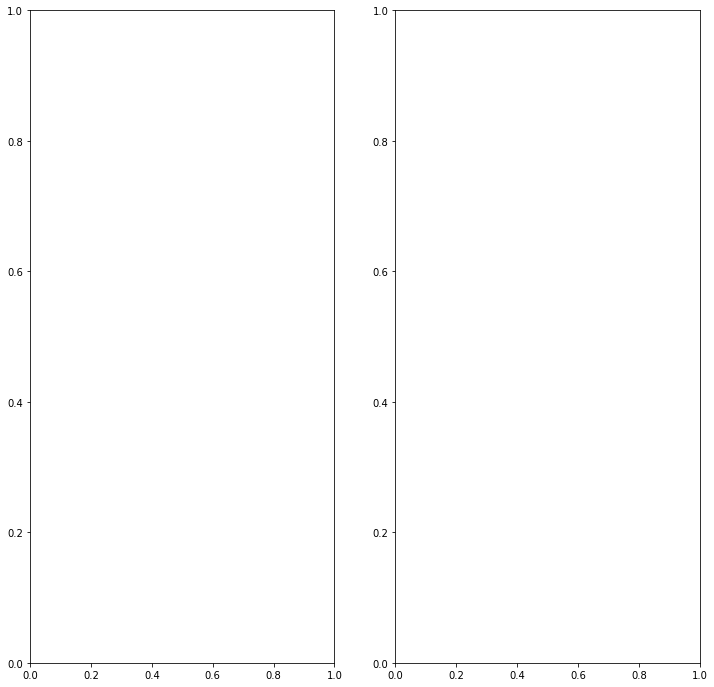

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_10'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()